In [1]:
# 梯度下降法的模拟与可视化

In [65]:
# 创建一个等差数列 x 代表模型的参数取值，共计250
import numpy as np
import matplotlib.pyplot as plt
plot_x = np.linspace(-1., 11., 250)
print(plot_x)

[-1.         -0.95180723 -0.90361446 -0.85542169 -0.80722892 -0.75903614
 -0.71084337 -0.6626506  -0.61445783 -0.56626506 -0.51807229 -0.46987952
 -0.42168675 -0.37349398 -0.3253012  -0.27710843 -0.22891566 -0.18072289
 -0.13253012 -0.08433735 -0.03614458  0.01204819  0.06024096  0.10843373
  0.15662651  0.20481928  0.25301205  0.30120482  0.34939759  0.39759036
  0.44578313  0.4939759   0.54216867  0.59036145  0.63855422  0.68674699
  0.73493976  0.78313253  0.8313253   0.87951807  0.92771084  0.97590361
  1.02409639  1.07228916  1.12048193  1.1686747   1.21686747  1.26506024
  1.31325301  1.36144578  1.40963855  1.45783133  1.5060241   1.55421687
  1.60240964  1.65060241  1.69879518  1.74698795  1.79518072  1.84337349
  1.89156627  1.93975904  1.98795181  2.03614458  2.08433735  2.13253012
  2.18072289  2.22891566  2.27710843  2.3253012   2.37349398  2.42168675
  2.46987952  2.51807229  2.56626506  2.61445783  2.6626506   2.71084337
  2.75903614  2.80722892  2.85542169  2.90361446  2

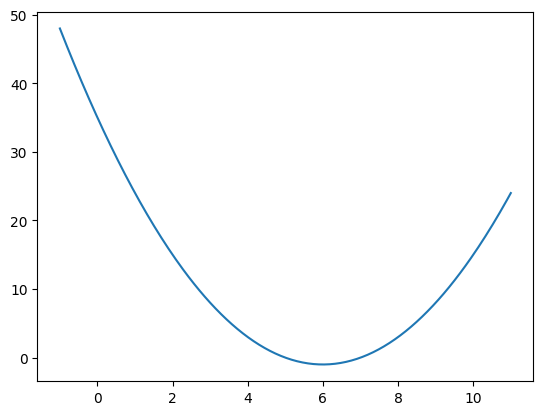

In [71]:
# 通过二次方程来模拟一个损失函数的计算，plot_y值就是图像上弧形线所对应的点
plot_y = (plot_x - 6) ** 2 - 1
plt.plot(plot_x, plot_y)
plt.show()

In [106]:
# 定义一个函数来计算theat 值对应的损失函数
def loss(theta):
    try:
       return (theta - 6) ** 2 -2.5
    except:
        # 计算溢出时，直接返回⼀个float的最⼤值
        return float('inf')


In [107]:
# 首先定义一个函数来计算上述损失函数的导数
def derivative(theta):
    return 2 * (theta - 6)

5.9998929564230465
-2.499999988541673
50


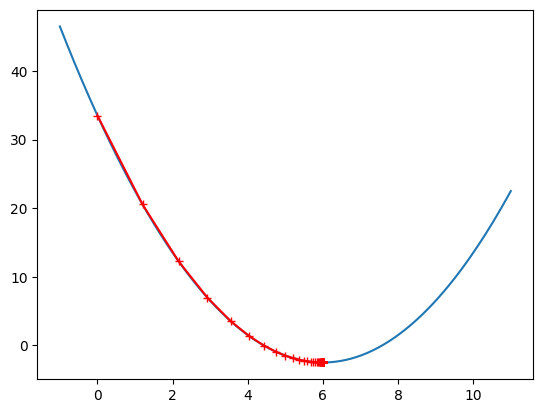

In [108]:
# 计算梯度值
# 以 0 为起点作为theta的起点
theta = 0.0
# 学习率
eta = 0.1
# 损失进度阈值
epsilon = 1e-8
# 记录每一步的theta变更的list
history_theta = [theta]
while True:
    # 计算当前theta 对应的梯度（导数）
    gradient = derivative(theta)
    # 记录上一次的theta值
    last_theta = theta
    # 更新theta值，向负导数方向移动一个步长（eta）
    theta = theta - eta * gradient
    # 记录更新后的theta值
    history_theta.append(theta)
    # 理论上theta最⼩值应当为0是最佳。但实际情况下，theta很难达到刚好等于0的
    # 所以我们可以设置⼀个最⼩值epsilon来表⽰我们的需要theta达到的最⼩值⽬标
    # 判断theta每次更新后,和上⼀个theta的差值是否已满⾜⼩于epsilon(最⼩值)的条
    # 满⾜的话就终⽌运算
    if abs(loss(theta) - loss(last_theta)) < epsilon:
        break
print(theta)
print(loss(theta))
# 查看计算了多少步
print(len(history_theta))
# 绘制theta变更的每一步，相应损失函数变化图
plt.plot(plot_x, loss(plot_x))
plt.plot(np.array(history_theta),loss(np.array(history_theta)), color='red', marker='+')
plt.show()

In [109]:
# 优化代码，抽取梯度下降方法
def gradient_descent(init_theta, eta, iter_num = 1e4, epsilon = 1e-8):
    # 记录每一步的theta变更的list
    theta = init_theta
    history_theta = [theta]
    iter = 0
    while iter < iter_num:
        # 计算当前theta 对应的梯度（导数）
        gradient = derivative(theta)
        # 记录上一次的theta值
        last_theta = theta
        # 更新theta值，向负导数方向移动一个步长（eta）
        theta = theta - eta * gradient
        # 记录更新后的theta值
        history_theta.append(theta)
        # 理论上theta最⼩值应当为0是最佳。但实际情况下，theta很难达到刚好等于0的
        # 所以我们可以设置⼀个最⼩值epsilon来表⽰我们的需要theta达到的最⼩值⽬标
        # 判断theta每次更新后,和上⼀个theta的差值是否已满⾜⼩于epsilon(最⼩值)的条
        # 满⾜的话就终⽌运算
        if abs(loss(theta) - loss(last_theta)) < epsilon:
            break
        # 每循环一次，迭代次数减 1
        iter += 1
    return history_theta

In [110]:
# 抽取绘图代码
def plot_history_theta(history_theta):
    # 绘制theta变更的每一步，相应损失函数变化图
    plt.plot(plot_x, loss(plot_x))
    plt.plot(np.array(history_theta),loss(np.array(history_theta)), color='red', marker='+')
    plt.show()

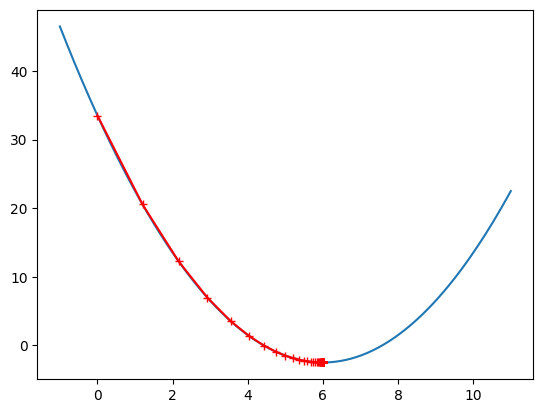

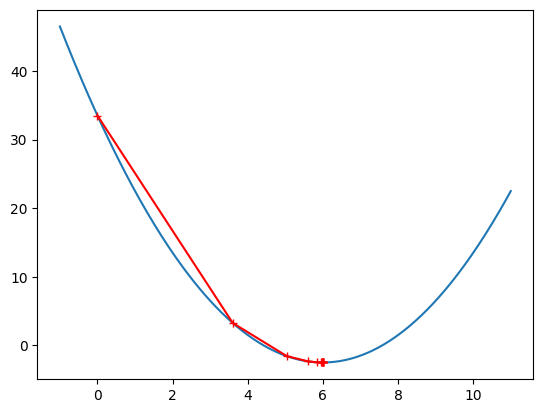

C:\Users\guifei\AppData\Local\Temp\ipykernel_16708\2399992943.py:4: RuntimeWarning: overflow encountered in square
  return (theta - 6) ** 2 -2.5
D:\Anaconda3-2020\anaconda\envs\study-env\Lib\site-packages\matplotlib\ticker.py:2176: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
D:\Anaconda3-2020\anaconda\envs\study-env\Lib\site-packages\matplotlib\ticker.py:2219: RuntimeWarning: overflow encountered in multiply
  ticks = np.arange(low, high + 1) * step + best_vmin


OverflowError: cannot convert float infinity to integer

<Figure size 640x480 with 1 Axes>

In [112]:
# 重新组织调用逻辑
# 计算不同学习率下的图像便于观察区别
# 1. 默认损失精度下，学习率为 0.1
history_theta_1 = gradient_descent(0, 0.1, 1000)
plot_history_theta(history_theta_1)
# 1. 默认损失精度下，学习率为 0.5
history_theta_2 = gradient_descent(0, 0.3, 1000)
plot_history_theta(history_theta_2)
# 1. 默认损失精度下，学习率为 1.1
history_theta_3 = gradient_descent(0, 1.1, 10001)
plot_history_theta(history_theta_3)
# 学习率为 1.1 是报错 OverflowError: (34, 'Result too large') 标识数据超出了其数据类型所能标识的最大范围，为避免
# 使用参数 iter_num 迭代次数，控制计算梯度的轮次





5.9999597346816
-2.499999998378704
5.999899336704
-2.4999999898669008
5.99974834176
-2.49999993666813


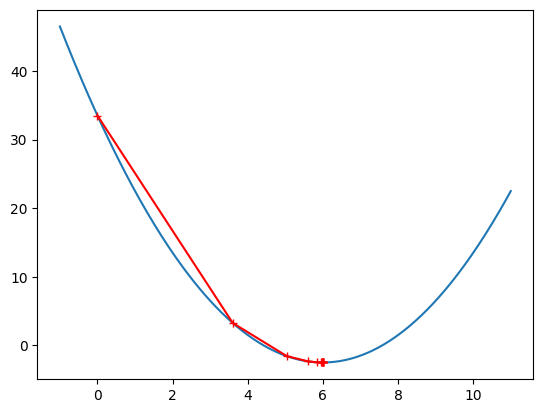

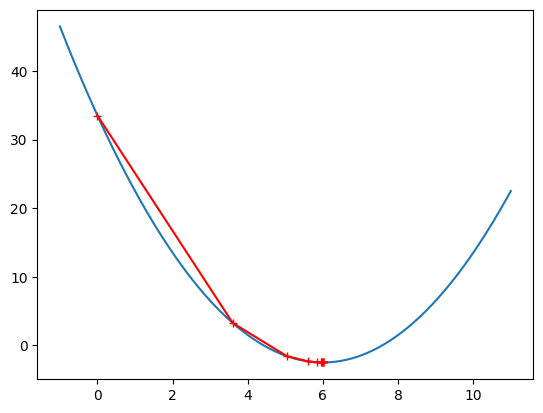

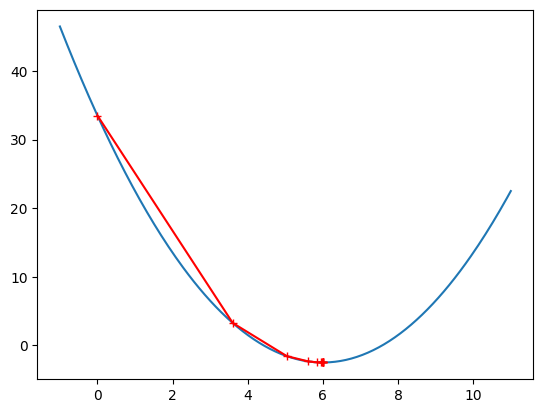

In [85]:
# 计算相同学习率下，不同损失精度的情形
# 计算不同学习率下的图像便于观察区别
# 1. 默认损失精度下，学习率为 0.3 损失精度为 1e-8
history_theta_4 = gradient_descent(0, 0.3, epsilon = 1e-8)
print(history_theta_4[-1])
print(loss(history_theta_4[-1]))
# 1. 默认损失精度下，学习率为 0.5
history_theta_5 = gradient_descent(0, 0.3, epsilon = 1e-7)
print(history_theta_5[-1])
print(loss(history_theta_5[-1]))
# 1. 默认损失精度下，学习率为 1.1
history_theta_6 = gradient_descent(0, 0.3, epsilon = 1e-6)
print(history_theta_6[-1])
print(loss(history_theta_6[-1]))
# 分别绘制3种不同学习率下的图片进行对比观察
plot_history_theta(history_theta_4)
plot_history_theta(history_theta_5)
plot_history_theta(history_theta_6)